<a href="https://colab.research.google.com/github/VVKMulukutla/FML/blob/main/ARIMA_Modelling_05A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aim of the Task :
* To predict the demand of Passengers in Airlines

# Resources Available :
*Date/Time, Passengers travelling in a month.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [32]:
data = pd.read_csv('/content/drive/MyDrive/AirPassengers.csv')
print(data)

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]


In [33]:
data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format = True)
data = data.set_index(['Month'])

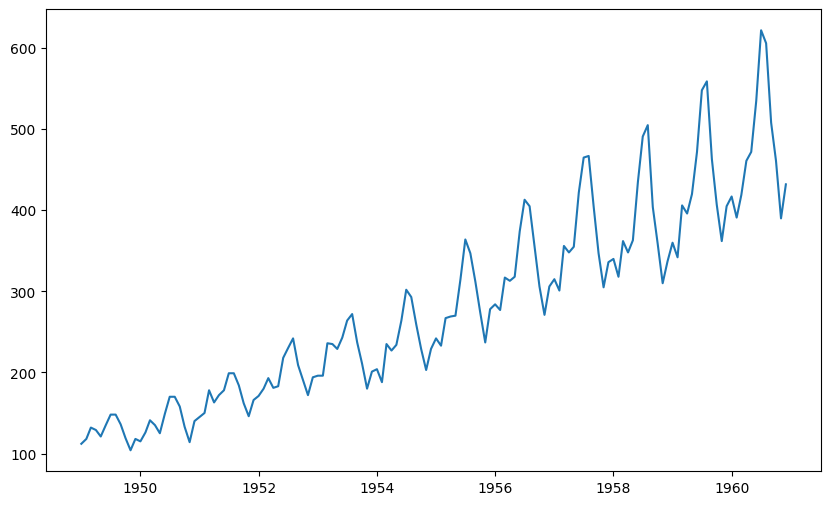

In [34]:
plt.plot(data)

In [35]:
#Calculating the Rolling mean(Moving Average) and Rolling Standard Deviation
rolling_mean = data.rolling(window=12).mean()
rolling_std = data.rolling(window = 12).std()

print(rolling_mean, rolling_std)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


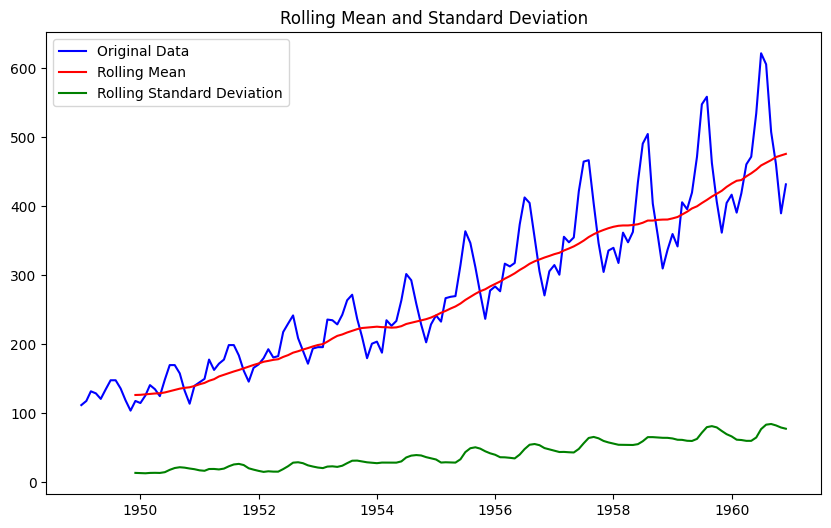

In [36]:
original = plt.plot(data, color = 'blue', label = 'Original Data')
mean = plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolling_std, color = 'green', label = 'Rolling Standard Deviation')

plt.legend()
plt.title("Rolling Mean and Standard Deviation")
plt.show()

In [10]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
from statsmodels.tsa.stattools import adfuller

adFuller_result = adfuller(data)
test_statistic = adFuller_result[0]
p_value = adFuller_result[1]
lags_used = adFuller_result[2]

In [21]:
# print(adFuller_result)
print(f"Test Statistic : {test_statistic}\nP_Value : {p_value}\nlags_used : {lags_used}")
print("Critical values : ")
for i, j in adFuller_result[4].items():
    print(f"\t{i} : {j}")

Test Statistic : 0.8153688792060498
P_Value : 0.991880243437641
lags_used : 13
Critical values : 
	1% : -3.4816817173418295
	5% : -2.8840418343195267
	10% : -2.578770059171598


In [49]:
from statsmodels.tsa.stattools import adfuller
def stationary_analysis(tsData):
    rolling_mean = tsData.rolling(window=12).mean()   
    rolling_std = tsData.rolling(window = 12).std()
    original = plt.plot(tsData, color = 'blue', label = 'Original Data')
    mean = plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolling_std, color = 'green', label = 'Rolling Standard Deviation')

    plt.legend(loc='best')
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block=False)

    adFuller_result = adfuller(tsData)
    test_statistic = adFuller_result[0]
    p_value = adFuller_result[1]
    lags_used = adFuller_result[2]
    print(f"Test Statistic : {test_statistic}\nP_Value : {p_value}\nlags_used : {lags_used}")
    print("Critical values : ")
    for i, j in adFuller_result[4].items():
        print(f"\t{i} : {j}")

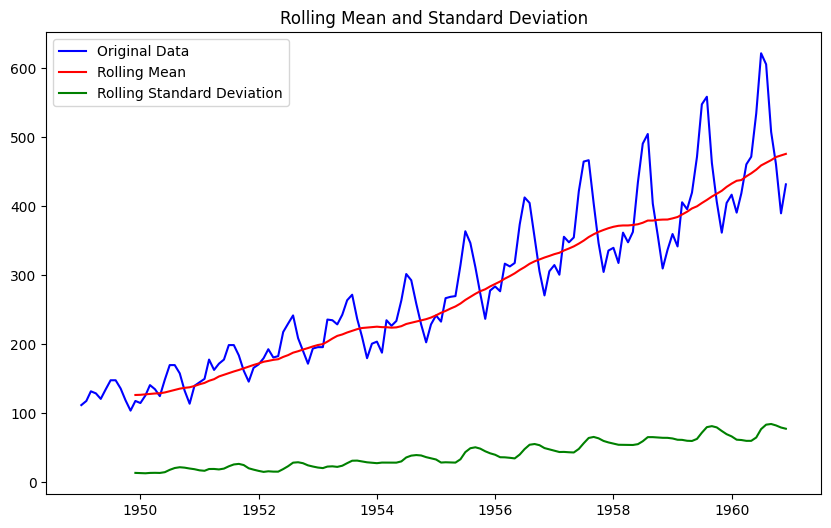

Test Statistic : 0.8153688792060498
P_Value : 0.991880243437641
lags_used : 13
Critical values : 
	1% : -3.4816817173418295
	5% : -2.8840418343195267
	10% : -2.578770059171598


In [50]:
stationary_analysis(data)

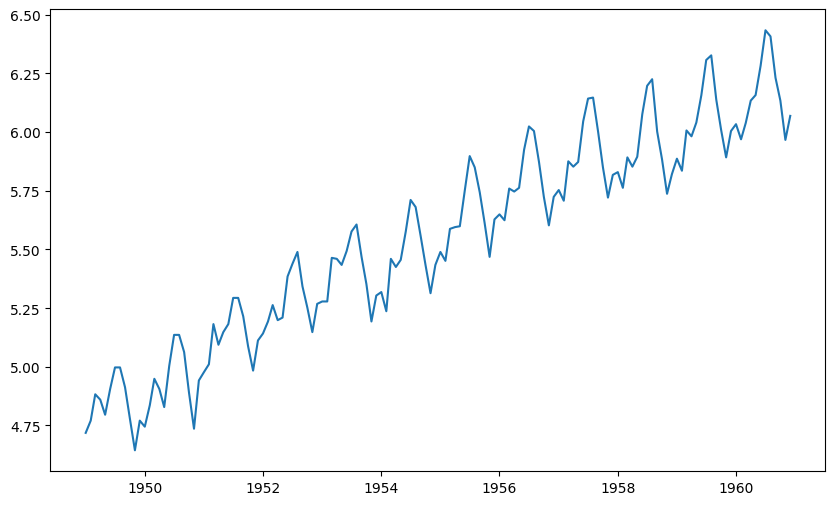

In [51]:
log_data = np.log(data)
plt.plot(log_data)

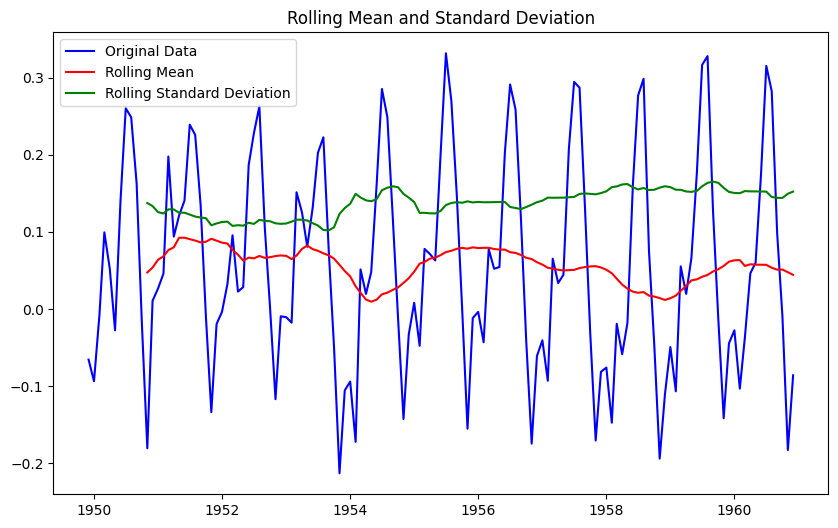

Test Statistic : -3.1629079913008833
P_Value : 0.022234630001242206
lags_used : 13
Critical values : 
	1% : -3.4865346059036564
	5% : -2.8861509858476264
	10% : -2.579896092790057


In [52]:
log_data_rolling = log_data.rolling(window = 12).mean()
diff = log_data - log_data_rolling
diff.dropna(inplace=True) 

stationary_analysis(diff)

# rolling_mean = log_data.rolling(window=12).mean()
# df_log_minus_mean = log_data - rolling_mean
# df_log_minus_mean.dropna(inplace=True)
# stationary_analysis(df_log_minus_mean)

In the abovbe graph, we made the p_value less than the threshold of 0.05. It indicates that the data is now stationary.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


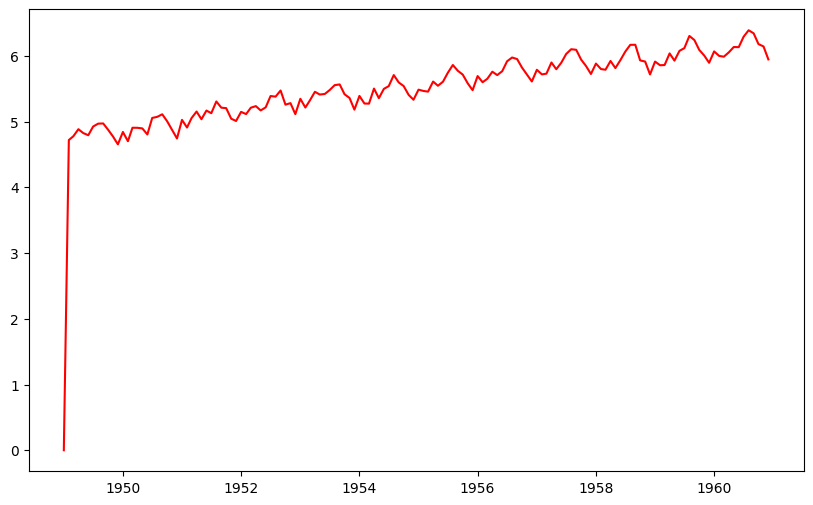

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

decomposition = seasonal_decompose(log_data) 
model = ARIMA(log_data, order=(2,1,2))
results = model.fit()
plt.plot(results.fittedvalues, color='red')